# Unsupervised Learning

## Data Preparation

### Import Libraries

In [1]:
# Standard Libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import time
# Data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Data Decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Data Visualization
from mpl_toolkits.mplot3d import Axes3D
# Clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# Data Analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
# Importing the Keras libraries and packages
from sklearn.neural_network import MLPClassifier

### Supporting Functions

#### K-Means Functions

In [2]:
# Returns Homogenity, Completeness, and Silhoutte Score and Variance for Various k-values
def kmeans_eval(X_train, y_train, X_test, y_test):
    scores_homo = []
    scores_comp = []
    scores_sil = []
    scores_var = []

    for clusters in range(3, 12):
        clf = KMeans(n_clusters= clusters, init='k-means++')
        clf.fit(X_train)
        y_test_pred = clf.predict(X_test)
      
        #Homogenity score on the test data
        homo = metrics.homogeneity_score(y_test, y_test_pred)
        scores_homo.append(homo)
        #Completeness score
        comp = metrics.completeness_score(y_test, y_test_pred)
        scores_comp.append(comp)
        #Silhoutette score
        sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
        scores_sil.append(sil)
        #Variance explained by the cluster
        var = clf.score(X_test)
        scores_var.append(var)
        
    return scores_homo, scores_comp, scores_sil, scores_var

In [3]:
# Plot Homogenity, Completeness, and Silhoutte Score
def plt_kmeans_scores(homo, comp, sil):
    clusters = range(3,12)
    fig,ax = plt.subplots()
    ax.plot(clusters, homo)
    ax.plot(clusters, comp)
    ax.plot(clusters, sil)
    plt.legend(['Homogenity','Completeness','Silhoutette'])
    plt.xlabel('Number of Clusters')
    plt.title('Performance Evaluation Scores - KMeans')
    plt.show()

In [4]:
# Plot Variance Explained by Each Cluster
def plt_var_per_cluster(var):
    clusters = range(3,12)
    plt.plot(clusters, var)
    plt.xlabel('Number of Clusters')
    plt.title('Variance Explained by Each Cluster - KMeans')
    plt.show()

In [5]:
#Training and testing accuracy for K = num_class
def kmeans_accuracy(X_train, X_test, y_train, y_test, init_mean, num_class=7):
    #Assigning the initial means as the mean feature vector for the class
    clf = KMeans(n_clusters= num_class, init = init_mean)
    clf.fit(X_train)

    #Training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    print('KMeans Training accuracy for K = ' + str(num_class) + ': ' + str(round(train_accuracy, 2)))    

    #Testing accuracy
    y_test_pred = clf.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    print('KMeans Testing accuracy for K = ' + str(num_class) + ': ' + str(round(test_accuracy, 2)))    

In [6]:
# Using the elbow method to find the optimal number of clusters
def elbow_method(X, start=1, end=10):
    wcss = []
    for i in range(start, end):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(start, end), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

#### GMM Functions

In [7]:
# Returns Performance Scores for Various k-values
def gmm_eval(X_train, y_train, X_test, y_test, num_iter=1000):
    scores_aic = []
    scores_bic = []
    scores_homo =[]
    scores_comp = []
    scores_sil = []
    scores_avg_log = []

    for clusters in range(3, 12):
        clf = GaussianMixture(n_components= clusters, covariance_type='spherical', max_iter=num_iter, init_params= 'kmeans')
        clf.fit(X_train)

        y_test_pred = clf.predict(X_test)
        #Per sample average log likelihood
        avg_log = clf.score(X_test)
        scores_avg_log.append(avg_log)
        #AIC on the test data
        aic = clf.aic(X_test)
        scores_aic.append(aic)
        #BIC on the test data
        bic = clf.bic(X_test)
        scores_bic.append(bic)
        #Homogenity score on the test data
        homo = metrics.homogeneity_score(y_test, y_test_pred)
        scores_homo.append(homo)
        #Completeness score
        comp = metrics.completeness_score(y_test, y_test_pred)
        scores_comp.append(comp)
        #Silhoutette score
        sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
        scores_sil.append(sil)

    return scores_aic, scores_bic, scores_homo, scores_comp, scores_sil, scores_avg_log

In [8]:
# Plot AIC/BIC Curve for GMM
def aic_bic_plt(aic, bic):
    clusters = range(3,12)
    fig,ax = plt.subplots()
    ax.plot(clusters, aic)
    ax.plot(clusters, bic)
    plt.legend(['AIC', 'BIC'])
    plt.xlabel('Number of Clusters')
    plt.title('AIC/BIC Curve - GMM')
    plt.show()

In [9]:
# Plot Homogenity, Completeness, and Silhoutte Score
def plt_gmm_scores(homo, comp, sil):
    clusters = range(3,12)
    fig,ax = plt.subplots()
    ax.plot(clusters, homo)
    ax.plot(clusters, comp)
    ax.plot(clusters, sil)
    plt.legend(['Homogenity','Completeness','Silhoutette'])
    plt.xlabel('Number of Clusters')
    plt.title('Performance Evaluation Scores - GMM')
    plt.show()

In [10]:
# Plot Avg Log Likelihood Per Sample
def plt_avg_log_likelihood(avg_log):
    clusters = range(3, 12)
    plt.plot(clusters, avg_log)
    plt.xlabel('Number of clusters')
    plt.title('Per sample average log likelihood - GMM')
    plt.show()

In [11]:
#Training and testing accuracy for K = num_class
def gmm_accuracy(X_train, X_test, y_train, y_test, init_means, num_iter=1000, num_class=7):
    
    clf = GaussianMixture(n_components=num_class ,covariance_type='spherical', max_iter=num_iter, init_params= 'kmeans')

    #Assigning the initial means as the mean feature vector for the class
    clf.means_init = init_means
    clf.fit(X_train)

    #Training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    print('Training accuracy for KMeans for K = ' + str(num_class) + ': ' + str(train_accuracy)) 

    #Testing accuracy
    y_test_pred = clf.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    print('Testing accuracy for KMeans for K = ' + str(num_class) + ': ' + str(test_accuracy))    

#### Dimensionality Reduction

In [12]:
# Reduce data with 'pca' or 'tsne' to select dimensions
def dim_reduce(X, method='pca', dim=2):
    if(method == 'pca'): return pd.DataFrame(PCA(n_components= dim).fit_transform(X))
    elif(method == 'tsne'): return pd.DataFrame(TSNE(n_components= dim).fit_transform(X))

# Reduce Data with pca or tsna to select dimensions and get labelled dataframe with target values
def dim_reduce_get_df(X, y, method='pca', dim=2):
    X = dim_reduce(X, method, dim)
    final_df = pd.concat([ X, pd.DataFrame(y)], axis = 1)
    columns = ['Principal Component 1', 'Principal Component 2','target']
    if dim == 3: columns.insert(2, 'Principal Component 3')
    final_df.columns = columns
    return final_df

#### Plotting Dimensionality-Reduced Data

In [13]:
# Plot 2D
# Pass in kmeans.cluster_centers_ to plot the clusters after reducing dimension
def plot_2d(df, centroids=None, has_clusters=False):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    #ax.set_xlabel('Principal Component 1', fontsize = 15)
    #ax.set_ylabel('Principal Component 2', fontsize = 15)
    unique = len(np.unique(df.iloc[:, -1]))
    targets = [0, 1, 2, 3, 4, 5][:unique]
    colors = ['r', 'b', 'g', 'c', 'm', 'k'][:unique]
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , c = color
                   , s = 50)
    if has_clusters: ax.scatter( centroids[:, 0], centroids[:, 1], s = 150, c = 'yellow', label = 'Centroids')
    ax.legend(targets)
    ax.grid()

In [14]:
# Plot 3D
def plot_3d(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.set_xlabel('Principal Component 1', fontsize = 15)
    #ax.set_ylabel('Principal Component 2', fontsize = 15)
    #ax.set_zlabel('Principal Component 3', fontsize = 15)
    unique = len(np.unique(df.iloc[:, -1]))
    targets = [0, 1, 2, 3, 4, 5][:unique]
    colors = ['r', 'b', 'g', 'c', 'm', 'k'][:unique]
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , df.loc[indicesToKeep, 'Principal Component 3']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

#### Accuracy Reporting Functions

In [508]:
# Making the Confusion Matrix
def conf_matrix_visualize(y_pred, y_test, ret=False):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    title = 'Accuracy: ' + str(accuracy)
    classes=['Positive', 'Negative']
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if ret: return cm, accuracy

### Data Preprocessing

#### Prepare Dataset 1 - Diabetes

In [120]:
df_1 = pd.read_csv('data/diabetes.csv')
X_d1 = df_1.iloc[:, :-1].values
y_d1 = df_1.iloc[:, -1].values

In [121]:
# Splitting data into training and testing and keeping testing data aside
X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(X_d1, y_d1, test_size = 0.2)

In [122]:
# Feature Scaling
sc = StandardScaler()
X_train_d1 = sc.fit_transform(X_train_d1)
X_test_d1 = sc.transform(X_test_d1)
X_d1 = sc.fit_transform(X_d1)

In [123]:
means_init_d1 = np.array([X_d1[y_d1 == i].mean(axis=0) for i in range(2)])

#### Prepare Dataset 2 - Heart Disease

In [20]:
df = pd.read_csv('data/heart.csv')
#df.head()
X_d2 = df.iloc[:, :-1].values
y_d2 = df.iloc[:, -1].values

In [21]:
# Splitting data into training and testing and keeping testing data aside
X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(X_d2, y_d2, test_size = 0.2)

In [308]:
# Feature Scaling
sc = StandardScaler()
X_train_d2 = sc.fit_transform(X_train_d2)
X_test_d2 = sc.transform(X_test_d2)
X_d2 = sc.fit_transform(X_d2)

In [23]:
means_init_d2 = np.array([X_d2[y_d2 == i].mean(axis=0) for i in range(2)])

### Experiment 1 - (Dataset 1) K-means

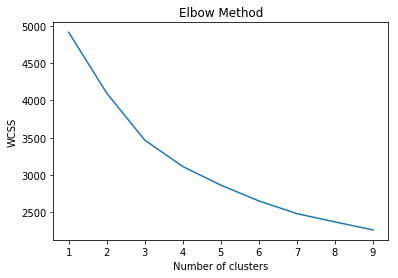

In [24]:
elbow_method(X_train_d1, start=1, end=10)

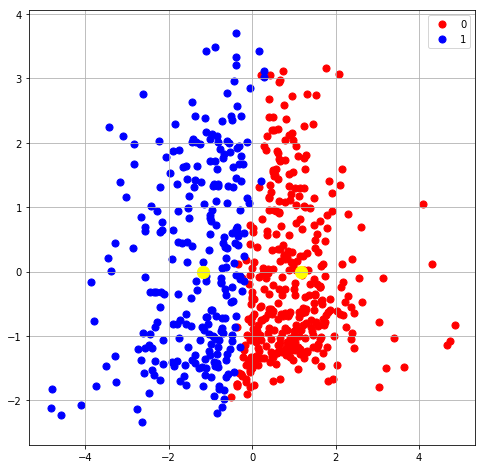

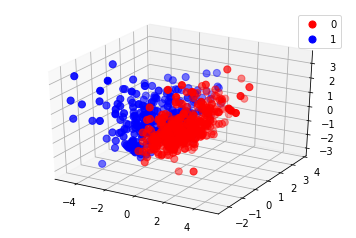

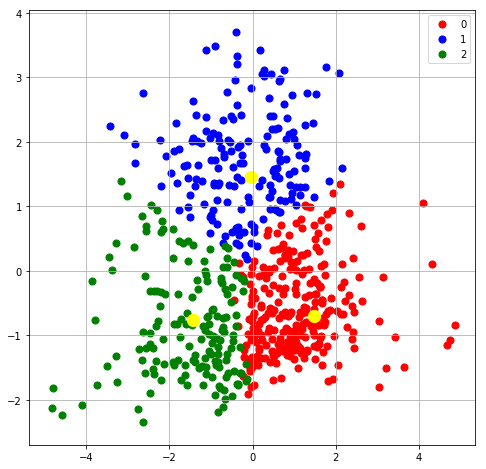

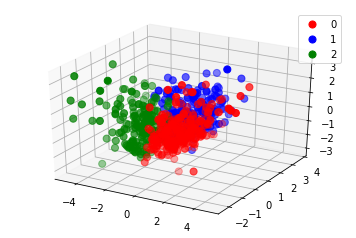

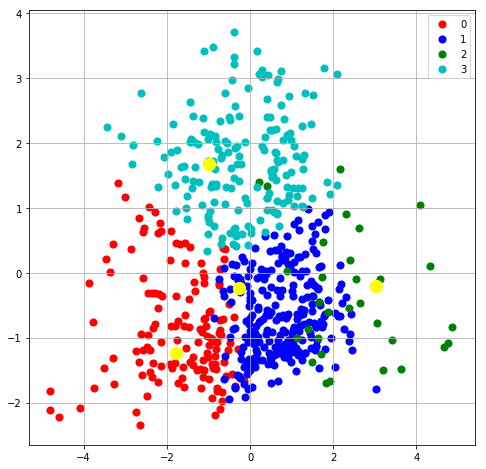

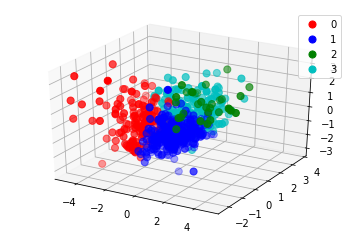

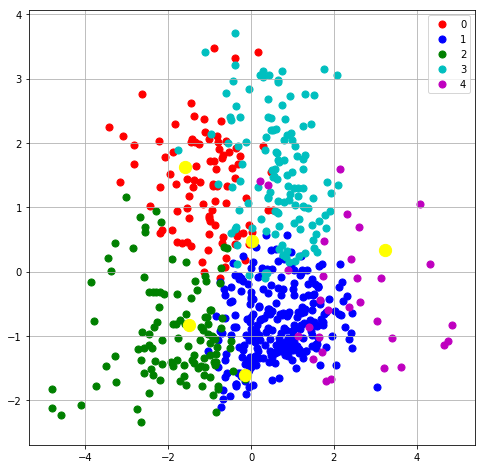

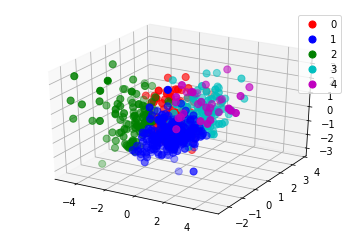

In [25]:
for i in range(2,6):
    # Fitting K-Means to the dataset
    kmeans = KMeans(n_clusters = i)
    y_kmeans = kmeans.fit_predict(X_train_d1)
    
    # 2-D Clusters for Different K-Values
    vis_kmeans_2d = dim_reduce_get_df(X_train_d1, y_kmeans, method='pca', dim=2)
    centers = dim_reduce(X = kmeans.cluster_centers_, dim = 2).values
    plot_2d(vis_kmeans_2d, centers, has_clusters=True)
    
    # 3-D Clusters for Different K-Values
    vis_kmeans_3d = dim_reduce_get_df(X_train_d1, y_kmeans, method='pca', dim=3)
    plot_3d(vis_kmeans_3d)

In [26]:
homo, comp, sil, var = kmeans_eval(X_train_d1, y_train_d1, X_test_d1, y_test_d1)

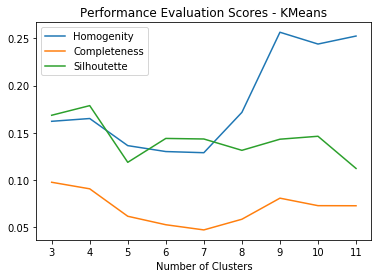

In [27]:
plt_kmeans_scores(homo, comp, sil)

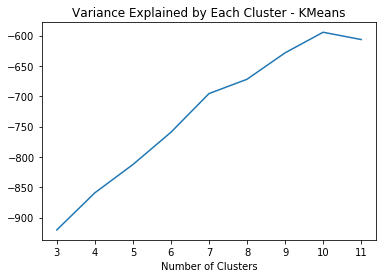

In [28]:
plt_var_per_cluster(var)

In [29]:
kmeans_accuracy(X_train_d1, X_test_d1, y_train_d1, y_test_d1, init_mean = means_init_d1, num_class=2)

KMeans Training accuracy for K = 2: 71.01
KMeans Testing accuracy for K = 2: 70.78


C:\Users\Kunal\Anaconda\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


### Experiment 2  - (Dataset 1) GMMs

In [30]:
# Visualize GMM

In [499]:
clf = GaussianMixture(n_components= 3, covariance_type='spherical', max_iter= 1000, init_params= 'kmeans')
clf.fit(X_train_d1)
y_pred = clf.predict(X_train_d1)

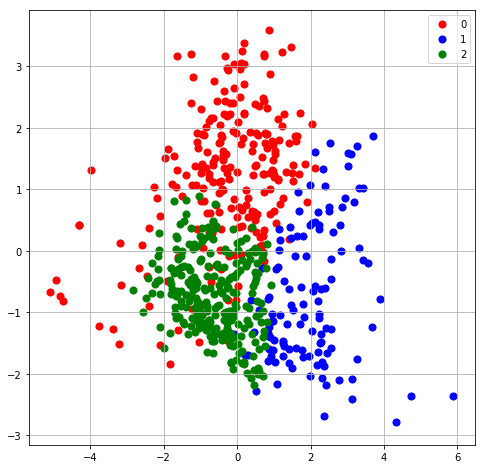

In [500]:
# 2D
vis_gmm_2d = dim_reduce_get_df(X_train_d1, y_pred, method='pca', dim=2)
plot_2d(vis_gmm_2d, has_clusters=False)

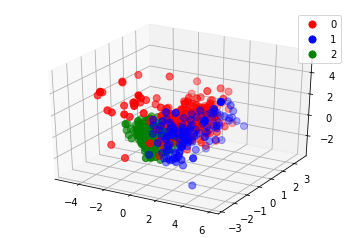

In [501]:
# 3D
vis_gmm_3d = dim_reduce_get_df(X_train_d1, y_pred, method='pca', dim=3)
plot_3d(vis_gmm_3d)

In [34]:
scores_aic, scores_bic, scores_homo, scores_comp, scores_sil, scores_avg_log = gmm_eval(X_train_d1, y_train_d1, X_test_d1, y_test_d1)

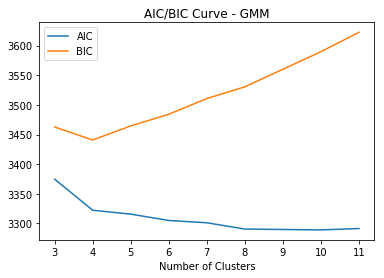

In [35]:
aic_bic_plt(scores_aic, scores_bic)

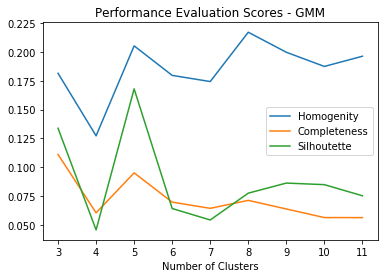

In [36]:
plt_gmm_scores(scores_homo, scores_comp, scores_sil)

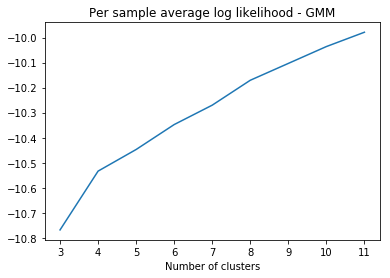

In [37]:
plt_avg_log_likelihood(scores_avg_log)

In [63]:
gmm_accuracy(X_train_d1, X_test_d1, y_train_d1, y_test_d1, means_init_d1, num_class=2)

Training accuracy for KMeans for K = 2: 66.61237785016286
Testing accuracy for KMeans for K = 2: 69.48051948051948


### Experiment 3  - (Dataset 1)  PCA

[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


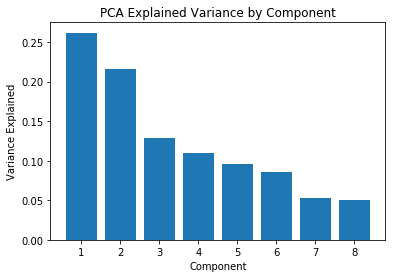

In [64]:
pca = PCA(n_components= 8)
data = pca.fit_transform(X_d1)
ratios = pca.explained_variance_ratio_
print(ratios)
plt.bar(range(1, 9), pca.explained_variance_ratio_)
plt.title('PCA Explained Variance by Component')
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.show()

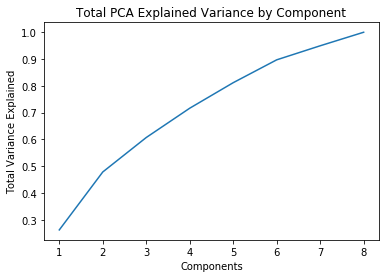

In [65]:
values = []
total = 0
for i in ratios:
    total += i
    values.append(total)
plt.plot(range(1, 9), values)
plt.title('Total PCA Explained Variance by Component')
plt.xlabel('Components')
plt.ylabel('Total Variance Explained')
plt.show()

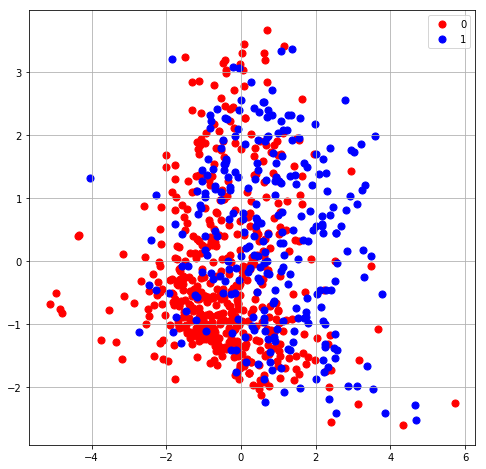

In [66]:
# Plot 2d
vis = dim_reduce_get_df(X_d1, y_d1, method='pca', dim=2)
plot_2d(vis, has_clusters=False)

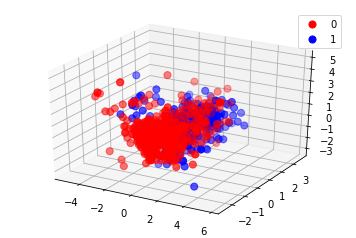

In [68]:
# Plot 3d
vis = dim_reduce_get_df(X_d1, y_d1, method='pca', dim=3)
plot_3d(vis)

### Experiment 4 - (Dataset 2) K-means

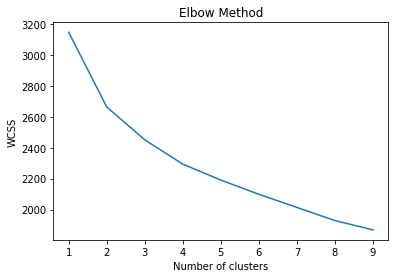

In [69]:
elbow_method(X_train_d2, start=1, end=10)

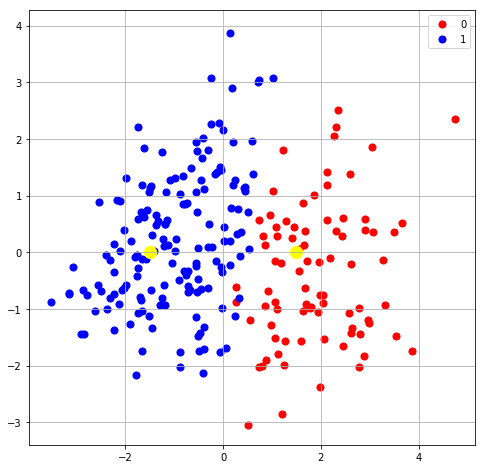

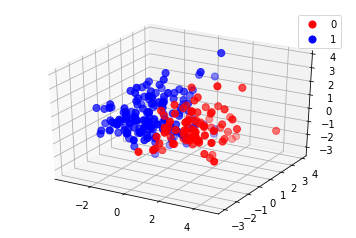

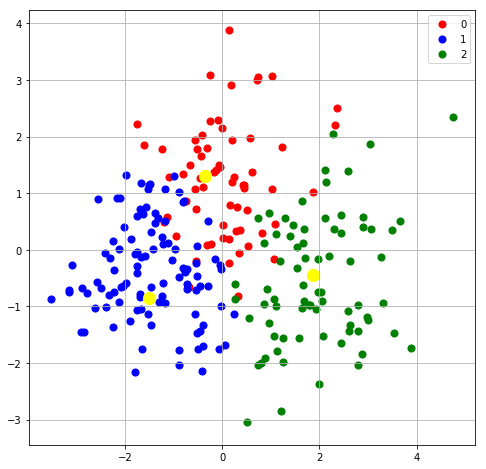

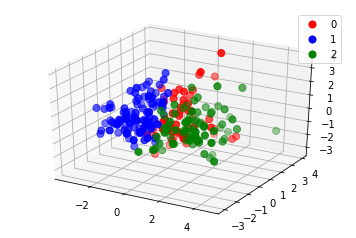

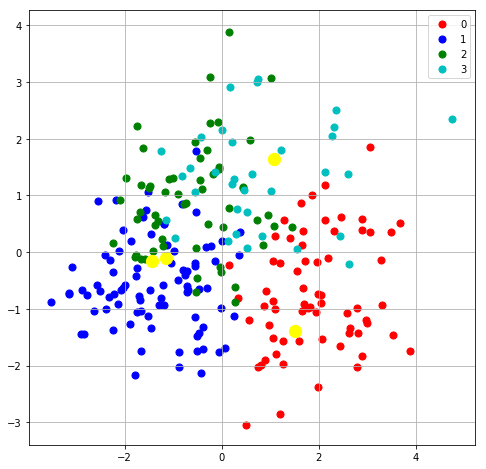

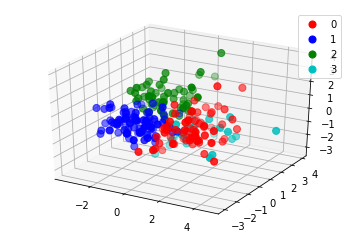

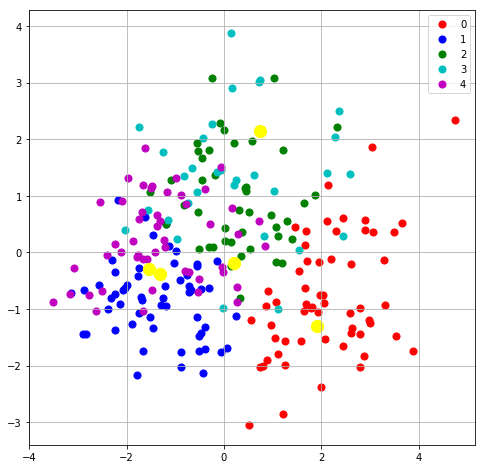

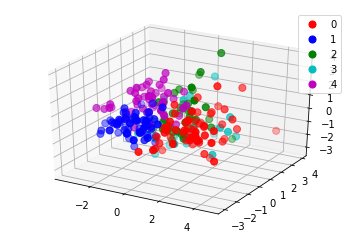

In [70]:
for i in range(2,6):
    # Fitting K-Means to the dataset
    kmeans = KMeans(n_clusters = i)
    y_kmeans = kmeans.fit_predict(X_train_d2)
    
    # 2-D Clusters for Different K-Values
    vis_kmeans_2d = dim_reduce_get_df(X_train_d2, y_kmeans, method='pca', dim=2)
    centers = dim_reduce(X = kmeans.cluster_centers_, dim = 2).values
    plot_2d(vis_kmeans_2d, centers, has_clusters=True)
    
    # 3-D Clusters for Different K-Values
    vis_kmeans_3d = dim_reduce_get_df(X_train_d2, y_kmeans, method='pca', dim=3)
    plot_3d(vis_kmeans_3d)

In [71]:
homo, comp, sil, var = kmeans_eval(X_train_d2, y_train_d2, X_test_d2, y_test_d2)

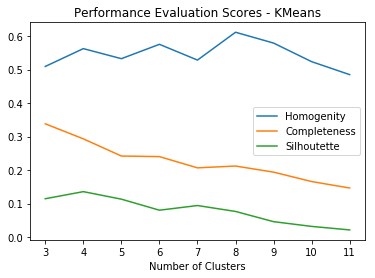

In [72]:
plt_kmeans_scores(homo, comp, sil)

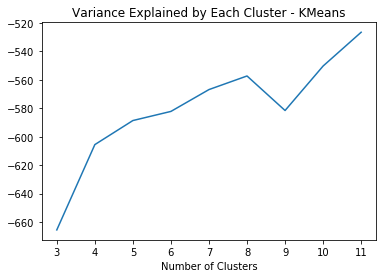

In [73]:
plt_var_per_cluster(var)

In [81]:
kmeans_accuracy(X_train_d2, X_test_d2, y_train_d2, y_test_d2, init_mean = means_init_d2, num_class=2)

KMeans Training accuracy for K = 2: 79.75
KMeans Testing accuracy for K = 2: 88.52


C:\Users\Kunal\Anaconda\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


### Experiment 5 - (Dataset 2) GMMs

In [ ]:
# Visualize GMM

In [82]:
clf = GaussianMixture(n_components= 3, covariance_type='spherical', max_iter= 1000, init_params= 'kmeans')
clf.fit(X_train_d2)
y_pred = clf.predict(X_train_d2)

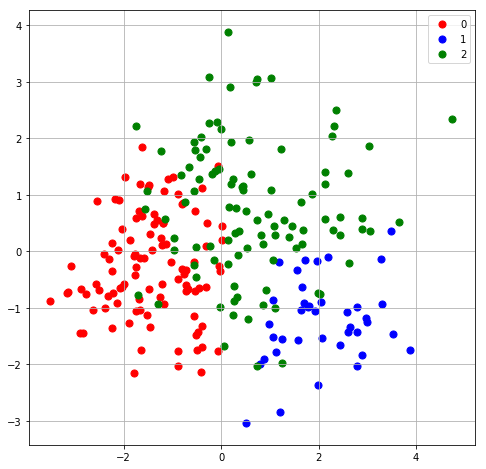

In [83]:
# 2D
vis_gmm_2d = dim_reduce_get_df(X_train_d2, y_pred, method='pca', dim=2)
plot_2d(vis_gmm_2d, has_clusters=False)

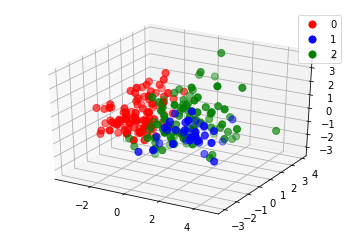

In [84]:
# 3D
vis = dim_reduce_get_df(X_train_d2, y_pred, method='pca', dim=3)
plot_3d(vis)

In [85]:
scores_aic, scores_bic, scores_homo, scores_comp, scores_sil, scores_avg_log = gmm_eval(X_train_d2, y_train_d2, X_test_d2, y_test_d2)

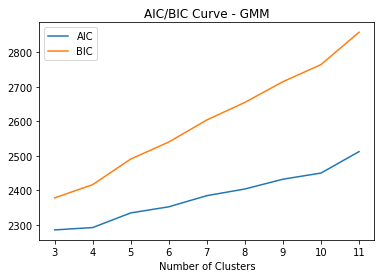

In [86]:
aic_bic_plt(scores_aic, scores_bic)

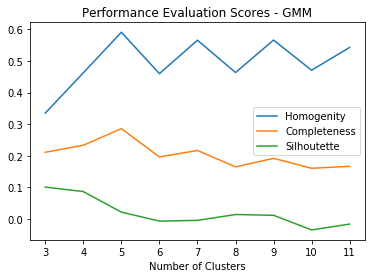

In [87]:
plt_gmm_scores(scores_homo, scores_comp, scores_sil)

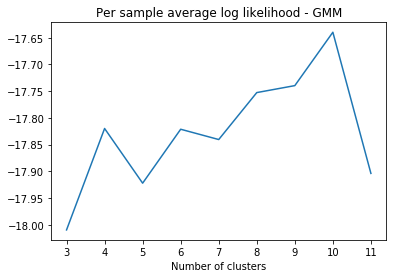

In [89]:
plt_avg_log_likelihood(scores_avg_log)

In [91]:
gmm_accuracy(X_train_d2, X_test_d2, y_train_d2, y_test_d2, means_init_d2, num_class=2)

Training accuracy for KMeans for K = 2: 45.867768595041326
Testing accuracy for KMeans for K = 2: 44.26229508196721


### Experiment 6 - (Dataset 2) PCA

[7.47564199e-01 1.50370221e-01 8.45968470e-02 1.62159604e-02
 3.84085658e-04 2.81234229e-04 2.28993383e-04 9.98328415e-05
 7.72143117e-05 5.87402295e-05 5.02927817e-05 4.09679747e-05
 3.14113086e-05]


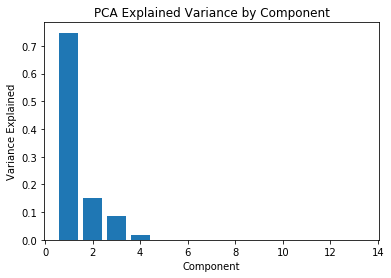

In [92]:
pca = PCA(n_components= 13)
data = pca.fit_transform(X_d2)
ratios = pca.explained_variance_ratio_
print(ratios)
plt.bar(range(1, 14), pca.explained_variance_ratio_)
plt.title('PCA Explained Variance by Component')
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.show()

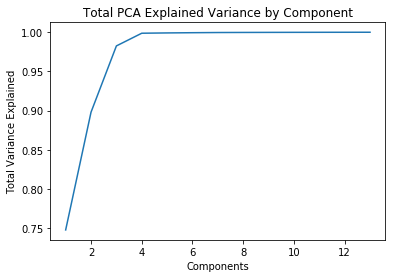

In [93]:
values = []
total = 0
for i in ratios:
    total += i
    values.append(total)
plt.plot(range(1, 14), values)
plt.title('Total PCA Explained Variance by Component')
plt.xlabel('Components')
plt.ylabel('Total Variance Explained')
plt.show()

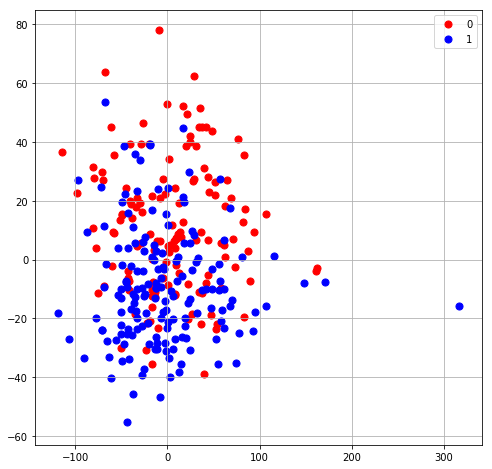

In [94]:
# Plot 2d
vis = dim_reduce_get_df(X_d2, y_d2, method='pca', dim=2)
plot_2d(vis, has_clusters=False)

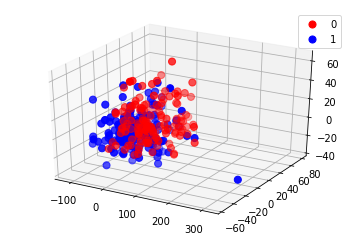

In [95]:
# Plot 3d
vis = dim_reduce_get_df(X_d2, y_d2, method='pca', dim=3)
plot_3d(vis)

### Experiment 7 - (Dataset 1) Post-PCA K-means

In [124]:
X_train_d1_pca = dim_reduce(X=X_train_d1, method='pca',dim=3)
X_test_d1_pca = dim_reduce(X=X_test_d1, method='pca',dim=3)

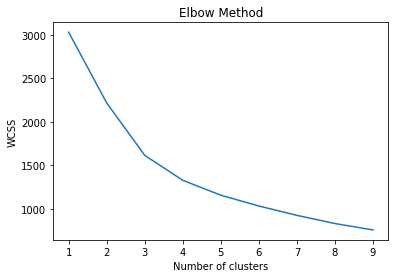

In [126]:
elbow_method(X_train_d1_pca, start=1, end=10)

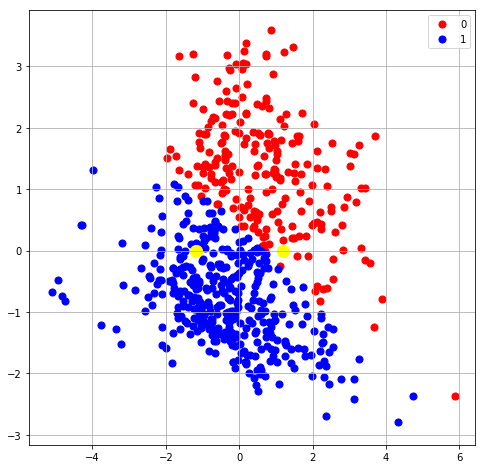

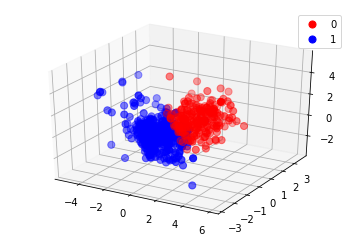

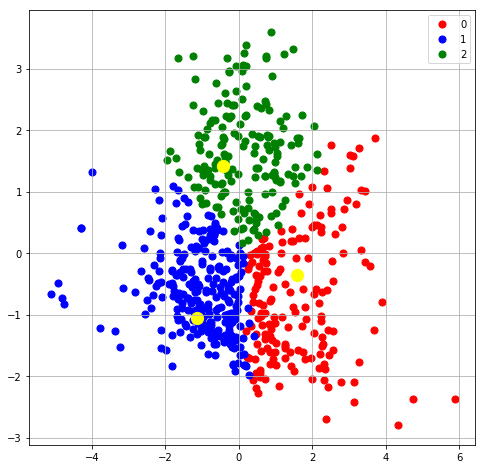

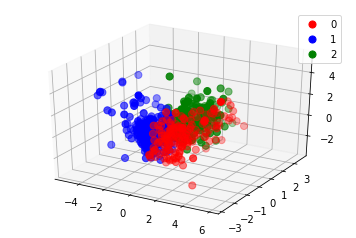

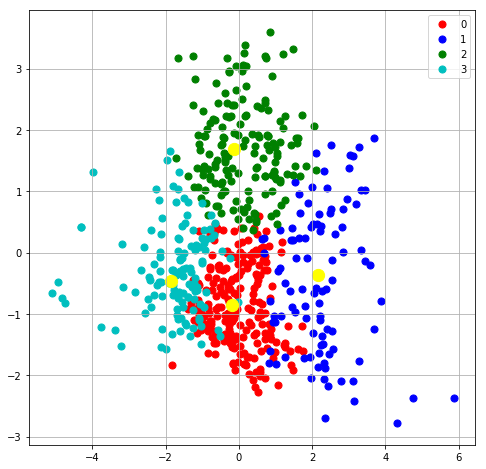

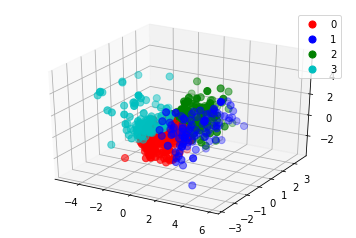

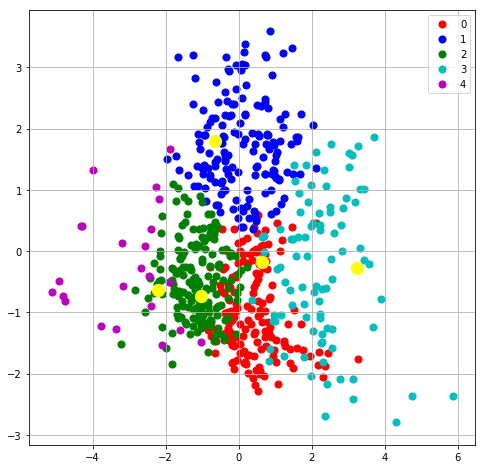

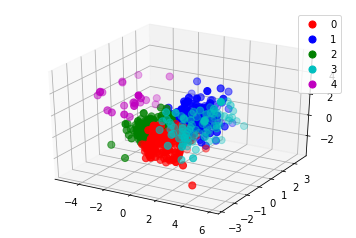

In [127]:
for i in range(2,6):
    # Fitting K-Means to the dataset
    kmeans = KMeans(n_clusters = i)
    y_kmeans = kmeans.fit_predict(X_train_d1_pca)
    
    # 2-D Clusters for Different K-Values
    vis_kmeans_2d = dim_reduce_get_df(X_train_d1_pca, y_kmeans, method='pca', dim=2)
    centers = dim_reduce(X = kmeans.cluster_centers_, dim = 2).values
    plot_2d(vis_kmeans_2d, centers, has_clusters=True)
    
    # 3-D Clusters for Different K-Values
    vis_kmeans_3d = dim_reduce_get_df(X_train_d1_pca, y_kmeans, method='pca', dim=3)
    plot_3d(vis_kmeans_3d)

In [128]:
homo, comp, sil, var = kmeans_eval(X_train_d1_pca, y_train_d1, X_test_d1_pca, y_test_d1)

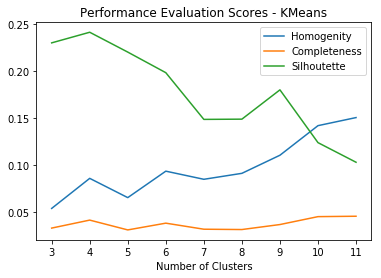

In [129]:
plt_kmeans_scores(homo, comp, sil)

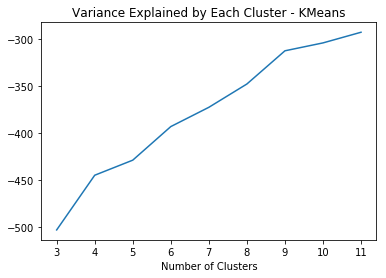

In [130]:
plt_var_per_cluster(var)

In [171]:
#kmeans_accuracy(X_train_d1_pca, X_test_d1_pca, y_train_d1, y_test_d1, init_mean = means_init_d1_pca, num_class=2)

### Experiment 8 - (Dataset 1) Post-PCA GMM

In [172]:
X_train_d1_pca = dim_reduce(X=X_train_d1, method='pca',dim=3)
X_test_d1_pca = dim_reduce(X=X_test_d1, method='pca',dim=3)

In [30]:
# Visualize GMM

In [502]:
clf = GaussianMixture(n_components= 3, covariance_type='spherical', max_iter= 1000, init_params= 'kmeans')
clf.fit(X_train_d1_pca)
y_pred = clf.predict(X_train_d1_pca)

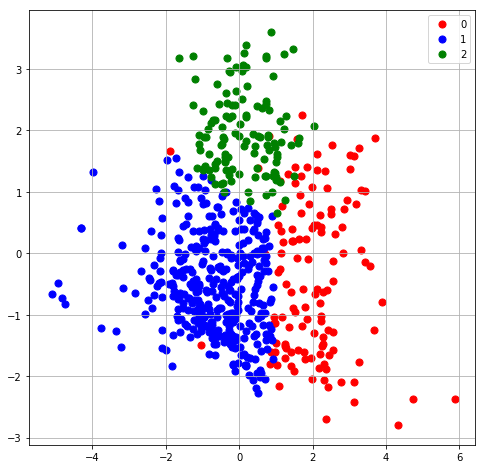

In [503]:
# 2D
vis_gmm_2d = dim_reduce_get_df(X_train_d1_pca, y_pred, method='pca', dim=2)
plot_2d(vis_gmm_2d, has_clusters=False)

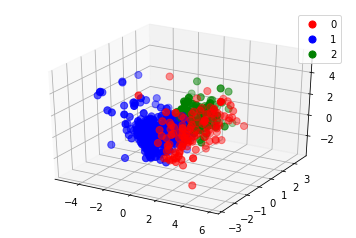

In [504]:
# 3D
vis_gmm_3d = dim_reduce_get_df(X_train_d1_pca, y_pred, method='pca', dim=3)
plot_3d(vis_gmm_3d)

In [176]:
scores_aic, scores_bic, scores_homo, scores_comp, scores_sil, scores_avg_log = gmm_eval(X_train_d1_pca, y_train_d1, X_test_d1_pca, y_test_d1)

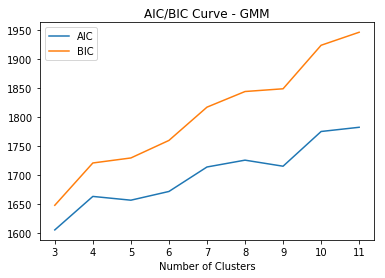

In [177]:
aic_bic_plt(scores_aic, scores_bic)

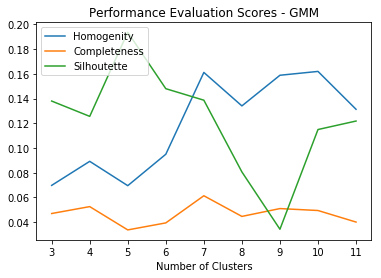

In [178]:
plt_gmm_scores(scores_homo, scores_comp, scores_sil)

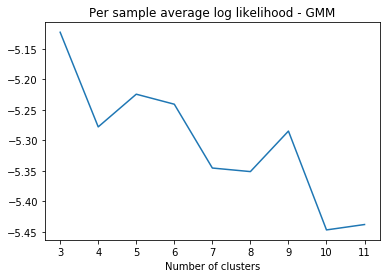

In [180]:
plt_avg_log_likelihood(scores_avg_log)

In [183]:
#gmm_accuracy(X_train_d1_pca, X_test_d1_pca, y_train_d1, y_test_d1, means_init_d1, num_class=2)

### Experiment 9 - (Dataset 2) Post-PCA K-means

In [184]:
X_train_d2_pca = dim_reduce(X=X_train_d2, method='pca',dim=3)
X_test_d2_pca = dim_reduce(X=X_test_d2, method='pca',dim=3)

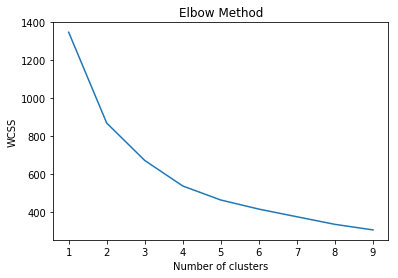

In [186]:
elbow_method(X_train_d2_pca, start=1, end=10)

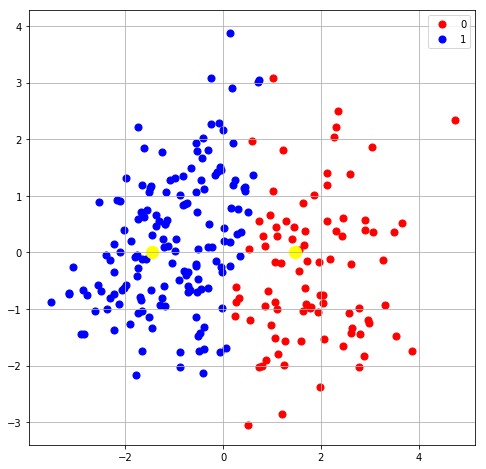

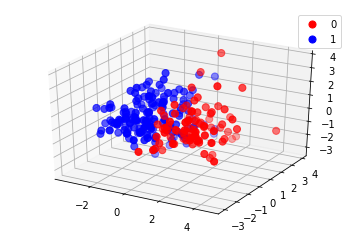

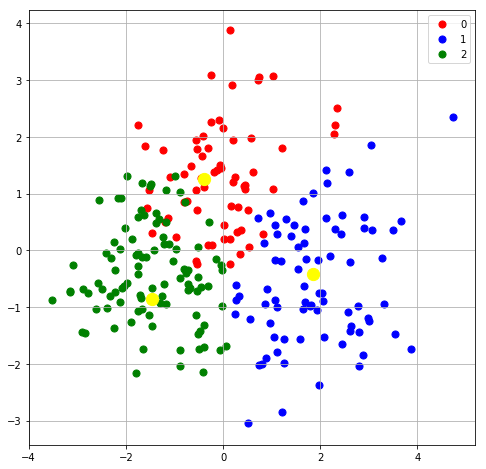

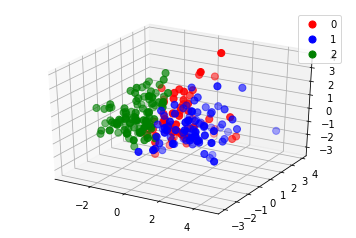

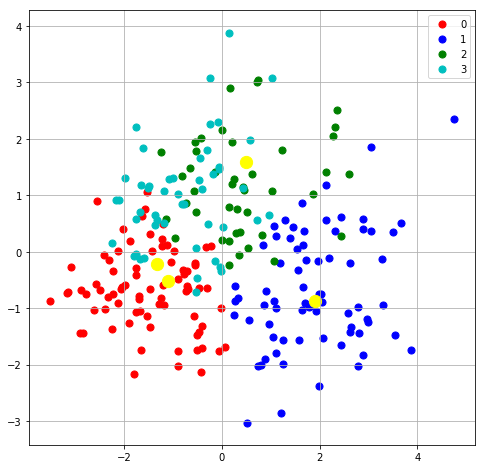

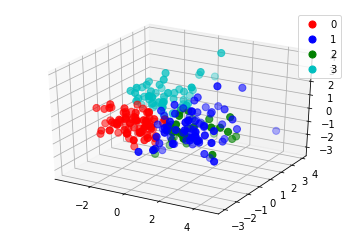

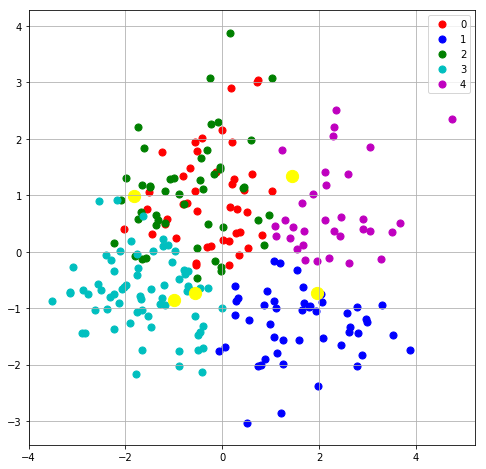

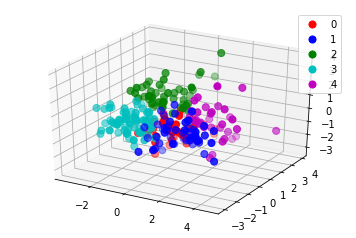

In [187]:
for i in range(2,6):
    # Fitting K-Means to the dataset
    kmeans = KMeans(n_clusters = i)
    y_kmeans = kmeans.fit_predict(X_train_d2_pca)
    
    # 2-D Clusters for Different K-Values
    vis_kmeans_2d = dim_reduce_get_df(X_train_d2_pca, y_kmeans, method='pca', dim=2)
    centers = dim_reduce(X = kmeans.cluster_centers_, dim = 2).values
    plot_2d(vis_kmeans_2d, centers, has_clusters=True)
    
    # 3-D Clusters for Different K-Values
    vis_kmeans_3d = dim_reduce_get_df(X_train_d2_pca, y_kmeans, method='pca', dim=3)
    plot_3d(vis_kmeans_3d)

In [188]:
homo, comp, sil, var = kmeans_eval(X_train_d2_pca, y_train_d2, X_test_d2_pca, y_test_d2)

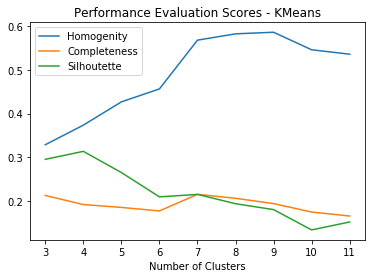

In [189]:
plt_kmeans_scores(homo, comp, sil)

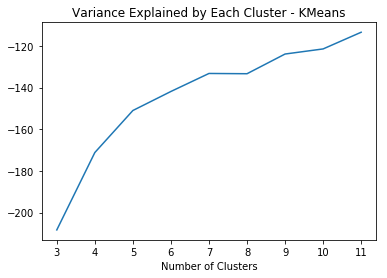

In [190]:
plt_var_per_cluster(var)

In [191]:
#kmeans_accuracy(X_train_d2, X_test_d2, y_train_d2, y_test_d2, init_mean = means_init_d2, num_class=2)

### Experiment 10 -  (Dataset 2) Post-PCA GMM

In [185]:
X_train_d2_pca = dim_reduce(X=X_train_d2, method='pca',dim=3)
X_test_d2_pca = dim_reduce(X=X_test_d2, method='pca',dim=3)

In [ ]:
# Visualize GMM

In [192]:
clf = GaussianMixture(n_components= 3, covariance_type='spherical', max_iter= 1000, init_params= 'kmeans')
clf.fit(X_train_d2_pca)
y_pred = clf.predict(X_train_d2_pca)

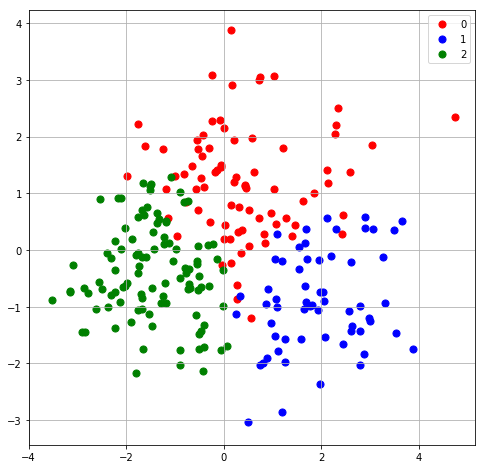

In [193]:
# 2D
vis_gmm_2d = dim_reduce_get_df(X_train_d2_pca, y_pred, method='pca', dim=2)
plot_2d(vis_gmm_2d, has_clusters=False)

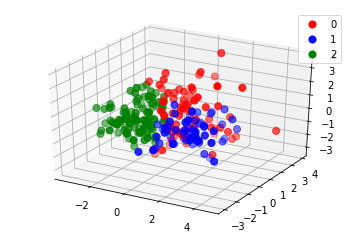

In [194]:
# 3D
vis = dim_reduce_get_df(X_train_d2_pca, y_pred, method='pca', dim=3)
plot_3d(vis)

In [195]:
scores_aic, scores_bic, scores_homo, scores_comp, scores_sil, scores_avg_log = gmm_eval(X_train_d2_pca, y_train_d2, X_test_d2_pca, y_test_d2)

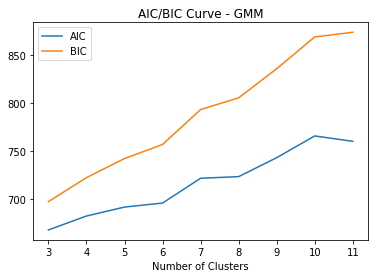

In [196]:
aic_bic_plt(scores_aic, scores_bic)

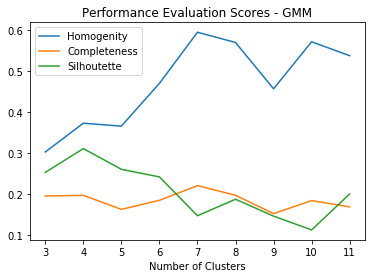

In [197]:
plt_gmm_scores(scores_homo, scores_comp, scores_sil)

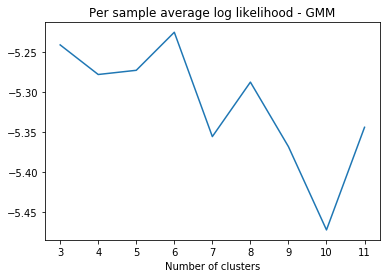

In [198]:
plt_avg_log_likelihood(scores_avg_log)

In [199]:
#gmm_accuracy(X_train_d2, X_test_d2, y_train_d2, y_test_d2, means_init_d2, num_class=2)

### Experiment 11 - (Dataset 2) Train NN on Post-PCA Data

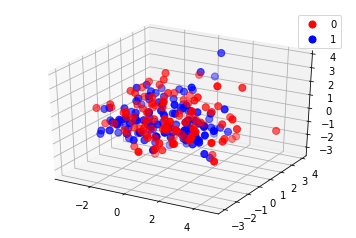

In [507]:
plot_3d(dim_reduce_get_df(X=X_train_d2_pca, y=y_train_d2, method='pca', dim=3))

C:\Users\Kunal\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(array([[20, 14],
        [ 9, 18]], dtype=int64), 0.6229508196721312)

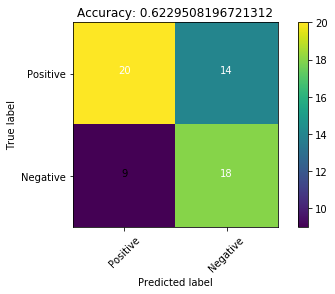

In [648]:
mlp = MLPClassifier(hidden_layer_sizes=(4), max_iter=300)
mlp.fit(X_train_d2_pca,y_train_d2)
y_pred = mlp.predict(X_test_d2_pca)
conf_matrix_visualize(y_test_d2, y_pred, ret=True)

### Experiment 12 - (Dataset 2) Train NN on Post-K-means

In [ ]:
# New Features: 
# 1. CLuster Classification
# 2. Distance to closest cluster
# 3. Distance to farthest cluster
# 4. Avg Distance to All Clusters

In [397]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X_d2)
all_dist = kmeans.fit_transform(X_d2)

In [385]:
dist_close = [min(i) for i in all_dist]

In [386]:
dist_far = [max(i) for i in all_dist]

In [387]:
dist_avg = [np.mean(i) for i in all_dist]

In [398]:
# One Hot Encode Cluster Labels
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_kmeans = ohe.fit_transform(y_kmeans.reshape(-1, 1)).toarray()

In [399]:
# Create DataFrame
kmeans_df = pd.DataFrame(y_kmeans,columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
kmeans_df['Dist_Close'] = pd.Series(dist_close)
kmeans_df['Dist_Far'] = pd.Series(dist_far)
kmeans_df['Dist_Avg'] = pd.Series(dist_avg)

In [401]:
X_d2_kmeans = kmeans_df

In [410]:
# Splitting data into training and testing and keeping testing data aside
X_train_d2_kmeans, X_test_d2_kmeans, y_train_d2, y_test_d2 = train_test_split(X_d2_kmeans, y_d2, test_size = 0.2)

In [411]:
# Feature Scaling
sc = StandardScaler()
X_train_d2_kmeans = sc.fit_transform(X_train_d2_kmeans)
X_test_d2_kmeans = sc.transform(X_test_d2_kmeans)
X_d2_kmeans = sc.fit_transform(X_d2_kmeans)

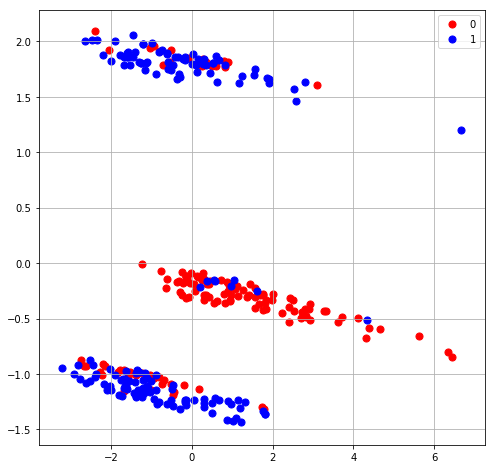

In [416]:
plot_2d(dim_reduce_get_df(X=X_d2_kmeans, y=y_d2, method='pca', dim=2))

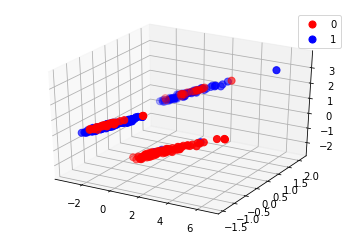

In [420]:
plot_3d(dim_reduce_get_df(X=X_d2_kmeans, y=y_d2, method='pca', dim=3))

(array([[12, 10],
        [17, 22]], dtype=int64), 0.5573770491803278)

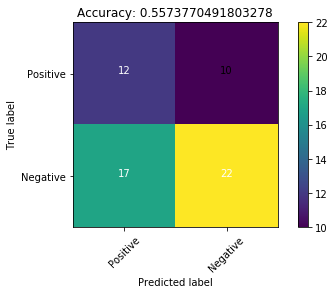

In [733]:
mlp = MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=400)
mlp.fit(X_train_d2_kmeans,y_train_d2)
y_pred = mlp.predict(X_test_d2_kmeans)
conf_matrix_visualize(y_test_d2, y_pred, ret=True)

### Experiment 13 - (Dataset 2) Train NN on Post-GMM

In [ ]:
# New Features: 
# 1. GMM Classification
# 2. Highest Probability of Being in a Cluster
# 3. Average Probability of Being in a Cluster
# 4. Weighted Log Probability

In [402]:
gmm = GaussianMixture(n_components= 3, covariance_type='spherical', max_iter= 1000, init_params= 'kmeans')
gmm.fit(X_d2) 
y_pred = gmm.predict(X_d2)
prob_pred = gmm.predict_proba(X_d2)
weighted_log_prob = gmm.score_samples(X_d2)

In [403]:
highest_prob = [max(i) for i in prob_pred]

In [404]:
avg_prob = [np.mean(i) for i in all_dist]

In [405]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_pred = ohe.fit_transform(y_pred.reshape(-1, 1)).toarray()

In [406]:
gmm_df = pd.DataFrame(y_pred,columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
gmm_df['Highest Probability'] = pd.Series(highest_prob)
gmm_df['Avg Probability'] = pd.Series(avg_prob)
gmm_df['Weighted Log Probability'] = pd.Series(weighted_log_prob)

In [409]:
X_d2_gmm = gmm_df

In [412]:
# Splitting data into training and testing and keeping testing data aside
X_train_d2_gmm, X_test_d2_gmm, y_train_d2, y_test_d2 = train_test_split(X_d2_gmm, y_d2, test_size = 0.2)

In [413]:
# Feature Scaling
sc = StandardScaler()
X_train_d2_gmm = sc.fit_transform(X_train_d2_gmm)
X_test_d2_gmm = sc.transform(X_test_d2_gmm)
X_d2_gmm = sc.fit_transform(X_d2_gmm)

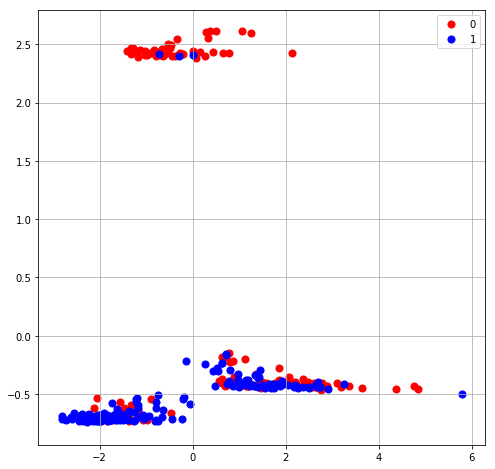

In [419]:
plot_2d(dim_reduce_get_df(X=X_d2_gmm, y=y_d2, method='pca', dim=2))

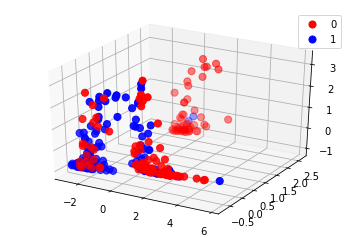

In [422]:
plot_3d(dim_reduce_get_df(X=X_d2_gmm, y=y_d2, method='pca', dim=3))

(array([[16,  6],
        [13, 26]], dtype=int64), 0.6885245901639344)

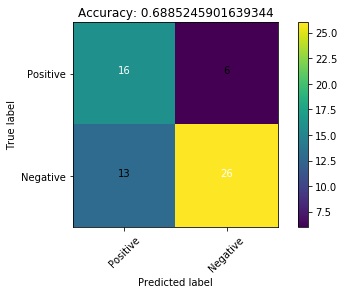

In [744]:
mlp = MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=200)
mlp.fit(X_train_d2_gmm,y_train_d2)
y_pred = mlp.predict(X_test_d2_gmm)
conf_matrix_visualize(y_test_d2, y_pred, ret=True)